In [7]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential  
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import fashion_mnist
import time

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 


In [9]:
x_train = x_train / 255.0 
x_test = x_test / 255.0 
x_train = x_train.reshape(-1, 28 *28 )
x_test = x_test .reshape(-1, 28 *28 )   


In [10]:
def build_model(activation='relu'):
    model = Sequential([
        Dense(256, activation=activation, input_shape=(784,)),
        Dense(128, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [12]:
activations=['sigmoid','tanh','relu']
histories={}
train_times={}

for act in activations:
    print(f"\n🔹 Training model with activation: {act.upper()}")
    model = build_model(act)
    start_time = time.time()
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=10,
        batch_size=128,
        verbose=1
    )
    end_time = time.time()
    histories[act] = history
    train_times[act] = end_time - start_time
    print(f"Training Time ({act}): {train_times[act]:.2f} seconds")


🔹 Training model with activation: SIGMOID


c:\Users\adity\.conda\envs\genai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6475 - loss: 1.0773 - val_accuracy: 0.8241 - val_loss: 0.4796
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8421 - loss: 0.4385 - val_accuracy: 0.8402 - val_loss: 0.4422
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8588 - loss: 0.3850 - val_accuracy: 0.8462 - val_loss: 0.4220
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8747 - loss: 0.3498 - val_accuracy: 0.8543 - val_loss: 0.3976
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8759 - loss: 0.3385 - val_accuracy: 0.8678 - val_loss: 0.3678
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8812 - loss: 0.3229 - val_accuracy: 0.8661 - val_loss: 0.3652
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8872 - loss: 0.3090 - val_accuracy: 0.8712 - val_loss: 0.3577
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8958 - loss: 0.2890 - val_accuracy: 0.

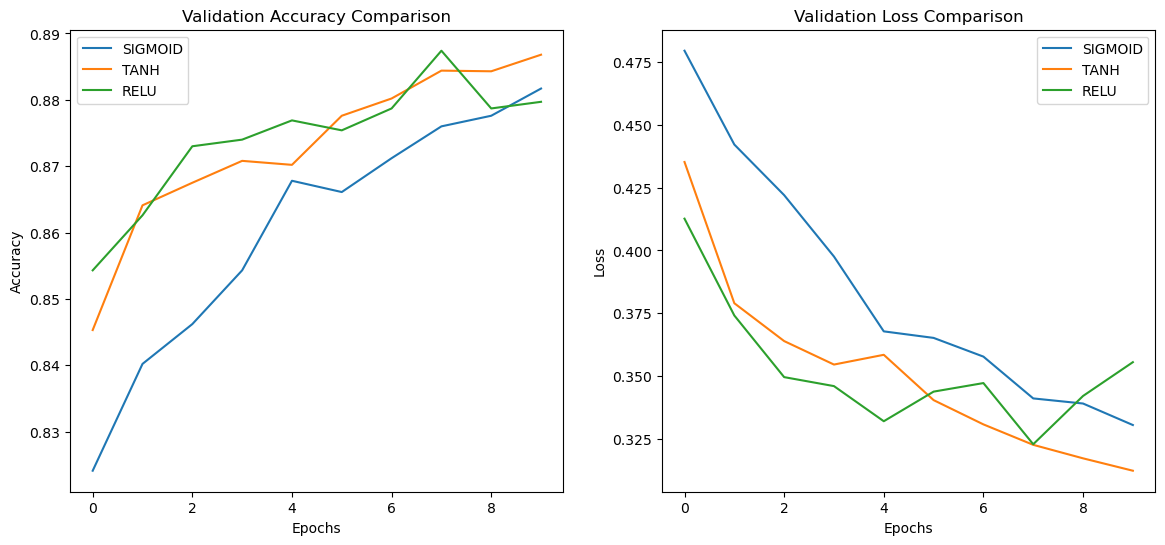

In [13]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
for act in activations:
    plt.plot(histories[act].history['val_accuracy'], label=f'{act.upper()}')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for act in activations:
    plt.plot(histories[act].history['val_loss'], label=f'{act.upper()}')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
for act in activations:
    final_acc = histories[act].history['val_accuracy'][-1]
    print(f"Final Validation Accuracy ({act.upper()}): {final_acc:.4f}")
    print(f"Training Time: {train_times[act]:.2f} seconds\n")

Final Validation Accuracy (SIGMOID): 0.8817
Training Time: 24.27 seconds

Final Validation Accuracy (TANH): 0.8868
Training Time: 29.17 seconds

Final Validation Accuracy (RELU): 0.8797
Training Time: 43.92 seconds




Computing gradient flow for SIGMOID

Computing gradient flow for TANH

Computing gradient flow for RELU


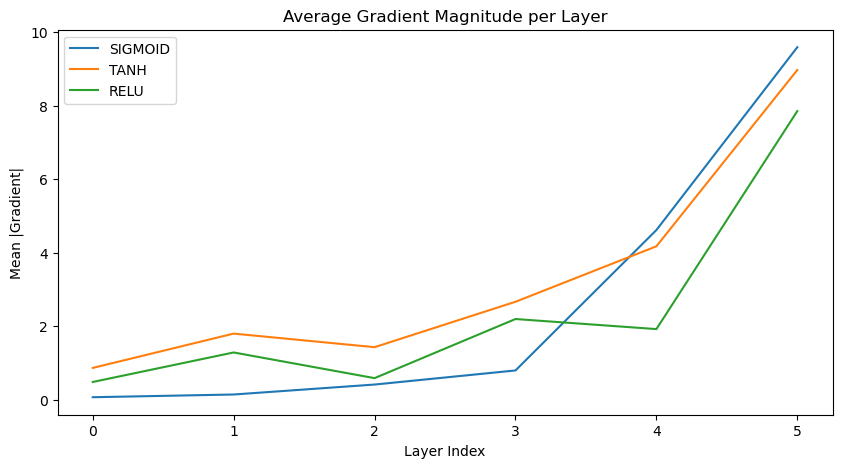

In [16]:
## calculate gradient flow
gradient_means = {}

for act in activations:
    print(f"\nComputing gradient flow for {act.upper()}")
    model = build_model(act)
    x_batch = x_train[:256]
    y_batch = y_train[:256]

    with tf.GradientTape() as tape:
        preds = model(x_batch, training=True)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_batch, preds)

    grads = tape.gradient(loss, model.trainable_variables)
    grad_norms = [tf.reduce_mean(tf.abs(g)).numpy() for g in grads if g is not None]
    gradient_means[act] = grad_norms


plt.figure(figsize=(10, 5))
for act in activations:
    plt.plot(gradient_means[act], label=f'{act.upper()}')
plt.title("Average Gradient Magnitude per Layer")
plt.xlabel("Layer Index")
plt.ylabel("Mean |Gradient|")
plt.legend()
plt.show()